# Flight Price Prediction

In [549]:
# to import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [550]:
#to import dataset
df = pd.read_excel("Flight_Prices.xlsx")

In [551]:
df.head()

,Unnamed: 0,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
0,0,Air India,17:55,22:10,4h 15m,New Delhi,Mumbai,Free Meal,1 Stop,"5,955"
1,1,Go First,17:05,21:10,4h 05m,New Delhi,Mumbai,eCash 250,1 Stop,"7,108"
2,2,Vistara,15:30,17:40,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"
3,3,Vistara,16:55,19:05,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"
4,4,Vistara,12:45,15:00,2h 15m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"


## Exploratory Data Analysis (EDA):

In [552]:
# to check dataset shape
df.shape

(5997, 10)

In [553]:
#to check datatype
df.dtypes

Unnamed: 0            int64
Airline              object
Departure_Time       object
Arrival_Time         object
Duration             object
Source               object
Destination          object
Meal_availability    object
Total_Stops          object
Price                object
dtype: object

In [554]:
# to check column names
df.columns

Index(['Unnamed: 0', 'Airline', 'Departure_Time', 'Arrival_Time', 'Duration',
       'Source', 'Destination', 'Meal_availability', 'Total_Stops', 'Price'],
      dtype='object')

In [555]:
#checking for Null Values
df.isnull().sum()

Unnamed: 0           0
Airline              0
Departure_Time       0
Arrival_Time         0
Duration             0
Source               0
Destination          0
Meal_availability    0
Total_Stops          0
Price                0
dtype: int64

In [556]:
# to get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5997 non-null   int64 
 1   Airline            5997 non-null   object
 2   Departure_Time     5997 non-null   object
 3   Arrival_Time       5997 non-null   object
 4   Duration           5997 non-null   object
 5   Source             5997 non-null   object
 6   Destination        5997 non-null   object
 7   Meal_availability  5997 non-null   object
 8   Total_Stops        5997 non-null   object
 9   Price              5997 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.6+ KB


In [557]:
#droppping unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [558]:
df.head()

,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
0,Air India,17:55,22:10,4h 15m,New Delhi,Mumbai,Free Meal,1 Stop,"5,955"
1,Go First,17:05,21:10,4h 05m,New Delhi,Mumbai,eCash 250,1 Stop,"7,108"
2,Vistara,15:30,17:40,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"
3,Vistara,16:55,19:05,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"
4,Vistara,12:45,15:00,2h 15m,New Delhi,Mumbai,Free Meal,Non Stop,"8,578"


In [559]:
# to check unique values
df.nunique()

Airline                6
Departure_Time        72
Arrival_Time          84
Duration             117
Source                 2
Destination            3
Meal_availability      5
Total_Stops            3
Price                 62
dtype: int64

In [560]:
#to get statistical details about dataset
df.describe()

,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
count,5997,5997,5997,5997,5997,5997,5997,5997,5997
unique,6,72,84,117,2,3,5,3,62
top,Vistara,20:35,07:50,2h 50m,New Delhi,Bangalore,Free Meal,1 Stop,"9,419"
freq,2583,490,631,325,4572,5947,4616,4001,940


In [561]:
# to get unique values in target column- price
df['Price'].unique()

array(['5,955', '7,108', '8,578', '8,579', '8,580', '8,684', '8,894',
       '9,293', '10,890', '9,419', '9,420', '9,997', '10,576', '11,047',
       '11,582', '11,940', '12,664', '12,675', '12,758', '13,204',
       '13,283', '13,745', '13,829', '14,355', '14,631', '14,981',
       '15,089', '15,296', '15,300', '15,367', '15,571', '15,615',
       '15,823', '15,959', '16,035', '16,138', '16,348', '16,873',
       '17,400', '17,608', '17,925', '17,987', '18,135', '18,240',
       '19,682', '19,934', '20,209', '20,235', '20,655', '21,042',
       '21,178', '21,180', '7,413', '7,938', '10,983', '17,913', '18,648',
       '21,166', '22,323', '22,953', '23,688', '23,793'], dtype=object)

In [562]:
# to get value count of target column
df['Price'].value_counts()

9,419     940
15,296    495
17,913    399
15,300    315
15,959    270
         ... 
5,955       1
8,894       1
10,890      1
9,293       1
8,684       1
Name: Price, Length: 62, dtype: int64

In [563]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')

In [564]:
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [565]:
df['Price'].unique()

array([ 5955.,  7108.,  8578.,  8579.,  8580.,  8684.,  8894.,  9293.,
       10890.,  9419.,  9420.,  9997., 10576., 11047., 11582., 11940.,
       12664., 12675., 12758., 13204., 13283., 13745., 13829., 14355.,
       14631., 14981., 15089., 15296., 15300., 15367., 15571., 15615.,
       15823., 15959., 16035., 16138., 16348., 16873., 17400., 17608.,
       17925., 17987., 18135., 18240., 19682., 19934., 20209., 20235.,
       20655., 21042., 21178., 21180.,  7413.,  7938., 10983., 17913.,
       18648., 21166., 22323., 22953., 23688., 23793.])

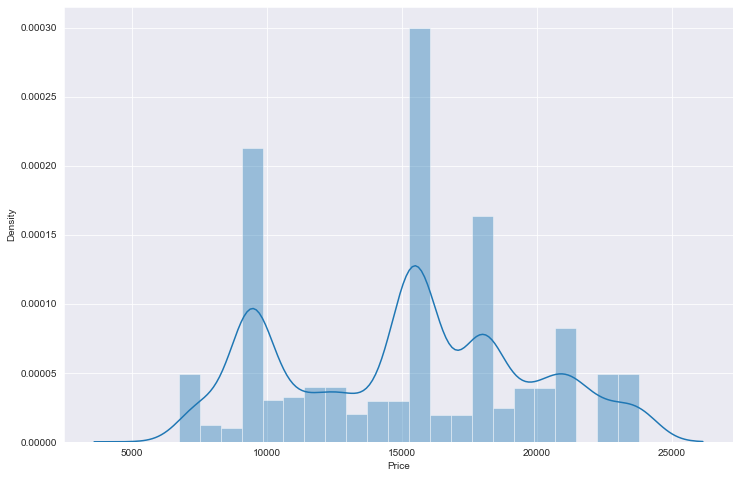

In [566]:
plt.figure(figsize=(12,8))
sns.distplot(df['Price'])
plt.show()

## Feature columns Analysis:

In [567]:
df['Departure_Time'].unique()

array(['17:55', '17:05', '15:30', '16:55', '12:45', '17:00', '23:35',
       '14:10', '14:30', '15:25', '16:15', '19:00', '19:45', '18:10',
       '18:20', '20:50', '21:40', '21:45', '17:50', '12:30', '12:35',
       '22:30', '18:25', '20:35', '14:55', '18:45', '15:50', '21:15',
       '17:20', '19:30', '16:20', '20:00', '15:10', '14:50', '16:10',
       '18:50', '13:35', '21:05', '17:15', '17:45', '22:55', '13:25',
       '15:15', '13:00', '13:45', '18:55', '21:30', '20:10', '18:30',
       '20:40', '16:05', '14:15', '18:00', '15:20', '15:00', '19:50',
       '13:20', '18:40', '14:20', '14:00', '17:10', '21:20', '17:35',
       '12:50', '15:55', '14:35', '17:30', '19:15', '22:25', '19:05',
       '19:40', '21:55'], dtype=object)

## Converting Departure_time datatype to timestamp(Datetime)

In [568]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

In [569]:
# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Departure_Time"]).dt.minute

In [570]:
# now dropping
df.drop(["Departure_Time"], axis = 1, inplace = True)

In [571]:
df.head()

,Airline,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min
0,Air India,22:10,4h 15m,New Delhi,Mumbai,Free Meal,1 Stop,5955.0,17,55
1,Go First,21:10,4h 05m,New Delhi,Mumbai,eCash 250,1 Stop,7108.0,17,5
2,Vistara,17:40,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,15,30
3,Vistara,19:05,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,16,55
4,Vistara,15:00,2h 15m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,12,45


In [572]:
df['Arrival_Time'].unique()

array(['22:10', '21:10', '17:40', '19:05', '15:00', '01:40', '16:20',
       '16:40', '17:35', '18:25', '21:55', '20:25', '20:35', '22:00',
       '23:05', '23:55', '00:10', '18:15', '18:50', '05:30', '20:00',
       '22:45', '17:10', '17:25', '20:05', '00:15', '05:45', '02:30',
       '02:40', '07:30', '07:25', '14:40', '21:25', '16:50', '18:10',
       '15:40', '23:35', '01:45', '18:00', '20:30', '20:45', '02:35',
       '21:15', '22:20', '22:55', '21:05', '21:45', '00:05', '08:20',
       '08:25', '12:10', '19:30', '23:00', '00:30', '19:55', '20:40',
       '23:20', '17:05', '23:40', '07:50', '18:20', '15:35', '21:35',
       '21:40', '22:40', '19:15', '15:55', '22:30', '21:50', '17:45',
       '11:10', '08:30', '08:45', '12:55', '14:35', '08:50', '23:10',
       '08:55', '12:30', '20:15', '16:15', '10:50', '11:50', '09:00'],
      dtype=object)

## Converting Arrival_time to timestamp(datetime) datatype

In [573]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [574]:
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [575]:
# now dropping
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [576]:
df.head()

,Airline,Duration,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Air India,4h 15m,New Delhi,Mumbai,Free Meal,1 Stop,5955.0,17,55,22,10
1,Go First,4h 05m,New Delhi,Mumbai,eCash 250,1 Stop,7108.0,17,5,21,10
2,Vistara,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,15,30,17,40
3,Vistara,2h 10m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,16,55,19,5
4,Vistara,2h 15m,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,12,45,15,0


In [577]:
duration = list(df["Duration"])

In [578]:
duration

['4h 15m',
 '4h 05m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 25m',
 '4h 20m',
 '5h 45m',
 '6h 15m',
 '7h 00m',
 '7h 25m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '1h 55m',
 '2h 10m',
 '5h 30m',
 '7h 15m',
 '8h 25m',
 '8h 30m',
 '9h 10m',
 '10h 15m',
 '10h 20m',
 '11h 30m',
 '13h 15m',
 '23h 30m',
 '26h 40m',
 '2h 00m',
 '2h 00m',
 '2h 20m',
 '2h 05m',
 '2h 00m',
 '6h 20m',
 '2h 15m',
 '2h 50m',
 '4h 35m',
 '5h 15m',
 '5h 15m',
 '5h 30m',
 '6h 00m',
 '6h 20m',
 '7h 10m',
 '7h 50m',
 '8h 00m',
 '8h 05m',
 '8h 20m',
 '9h 10m',
 '11h 30m',
 '12h 35m',
 '12h 55m',
 '13h 35m',
 '14h 00m',
 '22h 25m',
 '24h 35m',
 '2h 50m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 40m',
 '2h 50m',
 '4h 35m',
 '5h 15m',
 '5h 15m',
 '5h 30m',
 '6h 00m',
 '6h 20m',
 '7h 10m',
 '7h 50m',
 '8h 00m',
 '8h 05m',
 '8h 20m',
 '9h 10m',
 '11h 30m',
 '12h 3

In [579]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [580]:
#creating 
Duration_hours = []
Duration_mins = []

In [581]:
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [582]:
# Adding duration_hours and duration_mins list to train_data dataframe
df['Duration_hours'] = Duration_hours
df['Duration_min'] = Duration_mins

In [583]:
#now dropping
df.drop('Duration', axis=1, inplace=True)

In [584]:
df.head()

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,Air India,New Delhi,Mumbai,Free Meal,1 Stop,5955.0,17,55,22,10,4,15
1,Go First,New Delhi,Mumbai,eCash 250,1 Stop,7108.0,17,5,21,10,4,5
2,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,15,30,17,40,2,10
3,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,16,55,19,5,2,10
4,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,12,45,15,0,2,15


In [585]:
df['Meal_availability'].unique()

array(['Free Meal', 'eCash 250', 'Emissions: 142 Kg CO2',
       'Emissions: 185 Kg CO2', 'Emissions: 191 Kg CO2'], dtype=object)

### Replacing Ecash 250 to None

In [586]:
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')

### "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well.

In [587]:
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

In [588]:
df['Airline'].unique()

array(['Air India', 'Go First', 'Vistara', 'IndiGo', 'SpiceJet',
       'Air Asia'], dtype=object)

In [589]:
df['Airline'].value_counts()

Vistara      2583
Air India    1412
IndiGo       1029
Go First      349
SpiceJet      332
Air Asia      292
Name: Airline, dtype: int64

## visualisation

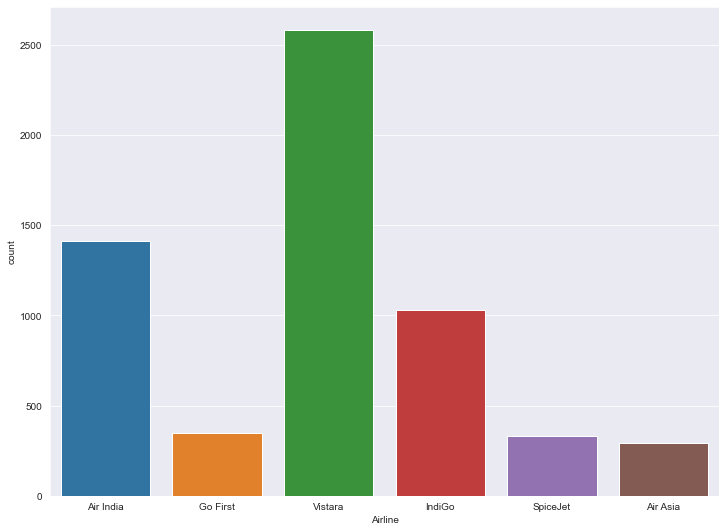

In [590]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,9))
sns.countplot(df['Airline'])
plt.show()

**Analysis conclusion :**

Vistara has largest share in market followed by AirIndia and Indigo. 

In [591]:
df['Source'].unique()

array(['New Delhi', 'Pune'], dtype=object)

In [592]:
df['Source'].value_counts()

New Delhi    4572
Pune         1425
Name: Source, dtype: int64

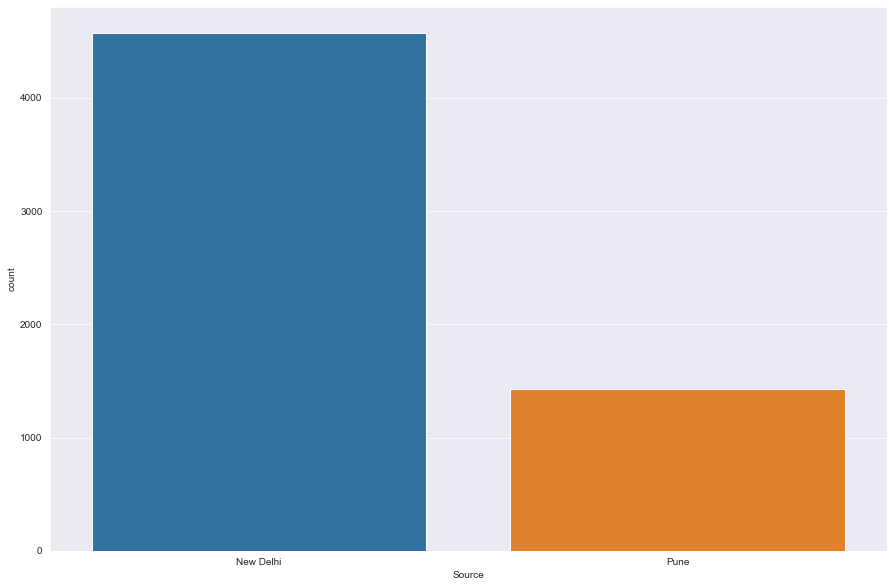

In [593]:
plt.figure(figsize=(15,10))
sns.countplot(df['Source'])
plt.show()

In our given dataset almost 76% of fight starts from New Delhi and rest from Pune

In [594]:
df['Destination'].unique()

array(['Mumbai', 'Pune', 'Bangalore'], dtype=object)

In [595]:
df['Destination'].value_counts()

Bangalore    5947
Mumbai         25
Pune           25
Name: Destination, dtype: int64

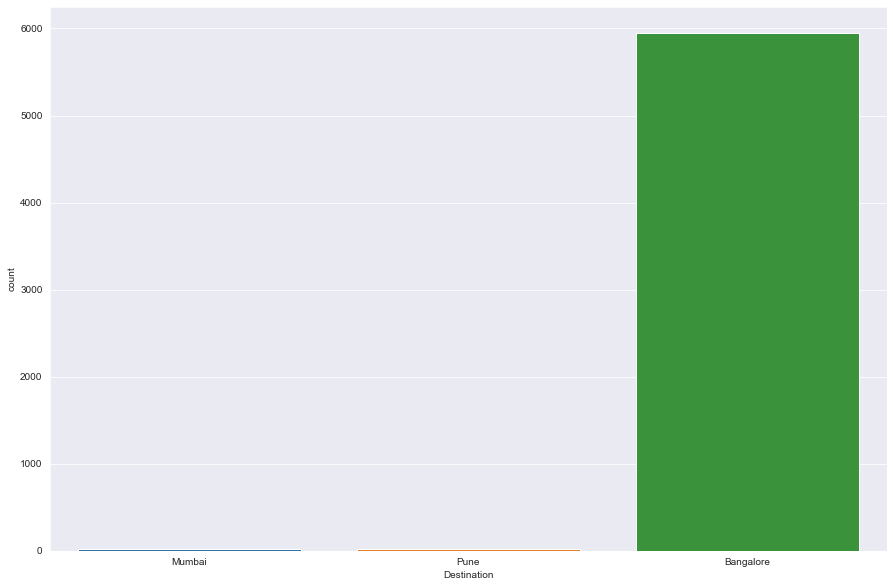

In [596]:
plt.figure(figsize=(15,10))
sns.countplot(df['Destination'])
plt.show()

In our given dataset almost 99% of fights destination is to Bangalore

## "Source" vs "Price"

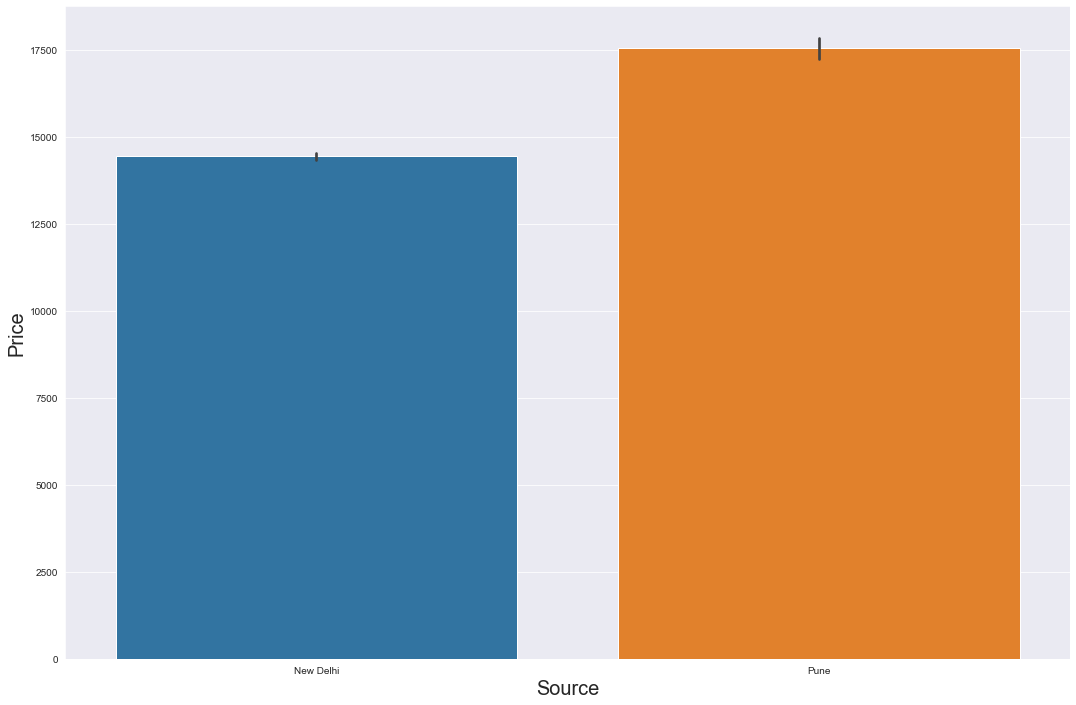

In [597]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Source',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Source',fontsize=20)
plt.show()

Ticket price of filghts starting from Pune is costlier than New Delhi

## "Destintaion" vs "Price"

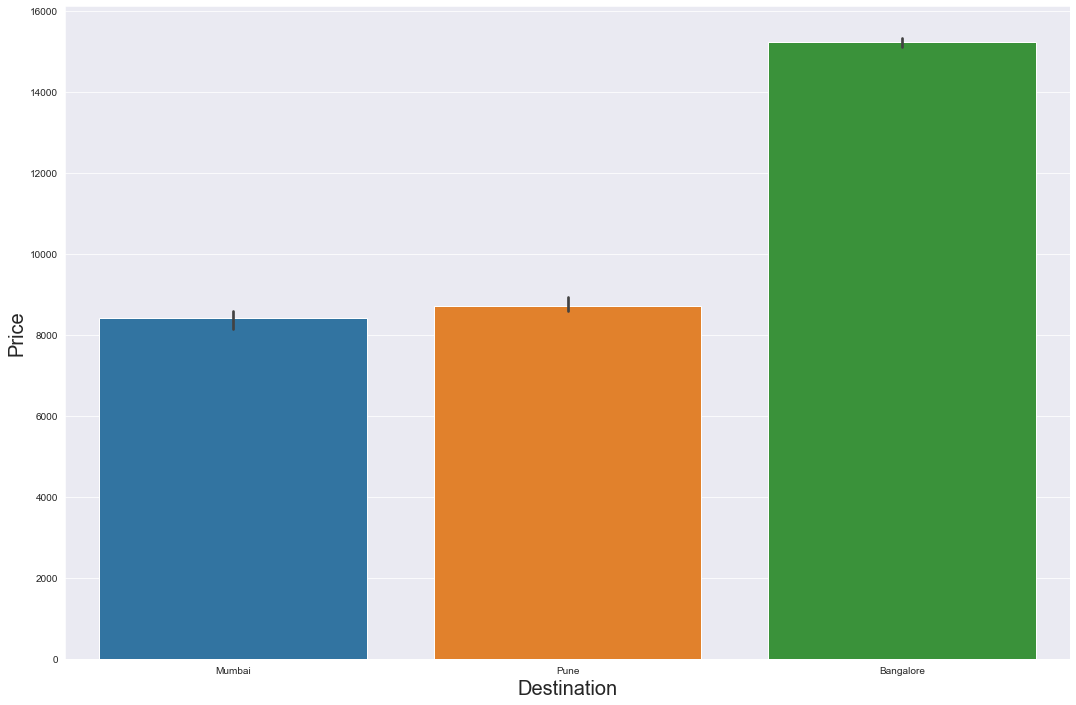

In [598]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Destination',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Destination',fontsize=20)
plt.show()

Ticket price of filghts to Bangalore is costlier than mumbai and pune

## "Airline" vs "Price"

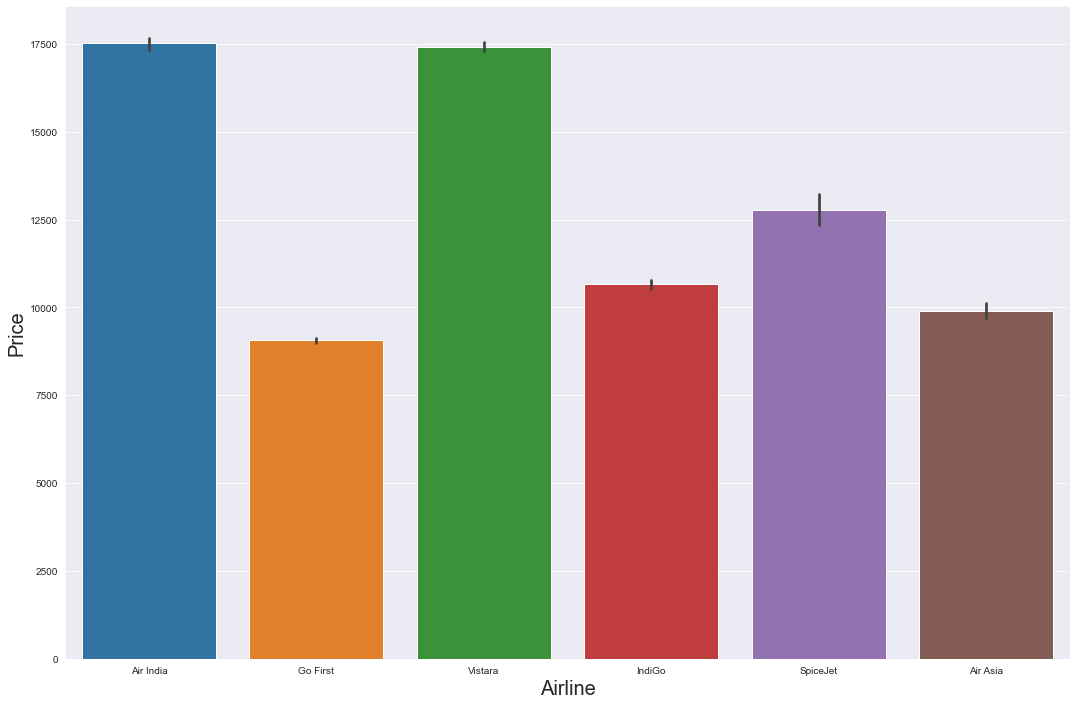

In [599]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Airline',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Airline',fontsize=20)
plt.show()

Ticket prices of AirIndia and Vistara are the costliest followed by SpiceJet,IndiGo,AirAsia and GoFirst

## "Total_Stops" vs "Price"

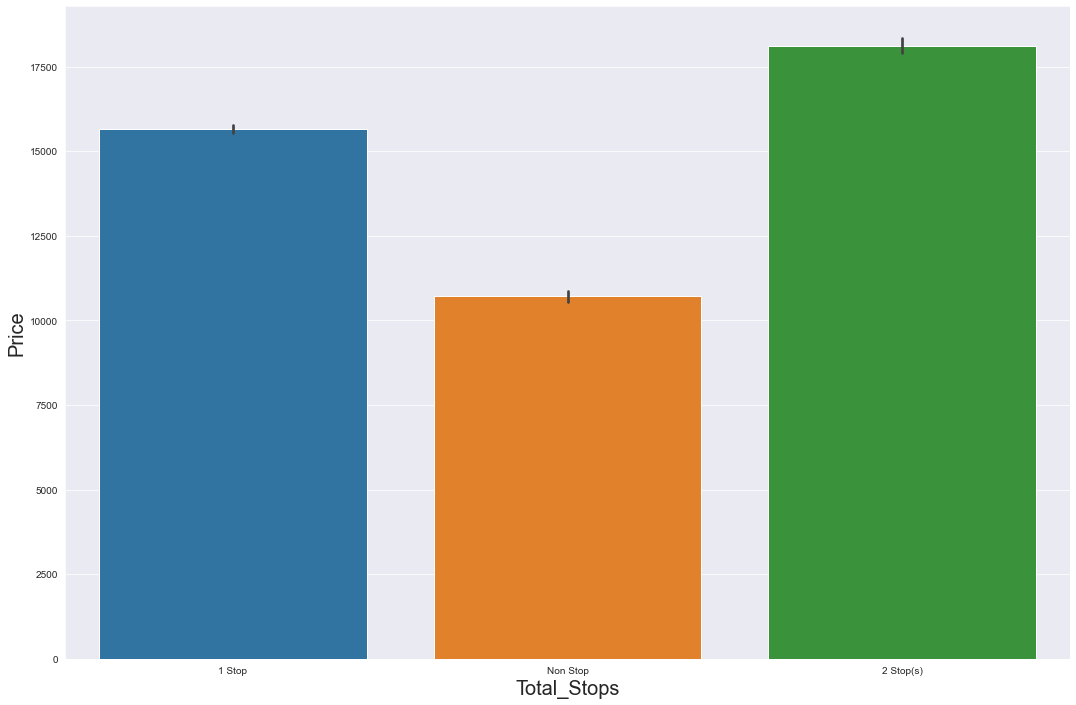

In [600]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Total_Stops',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Total_Stops',fontsize=20)
plt.show()

Ticket prices are high for fights with 2 stops.NonStop flight ticket prices are low.

## "Dep_hour" vs "Price"

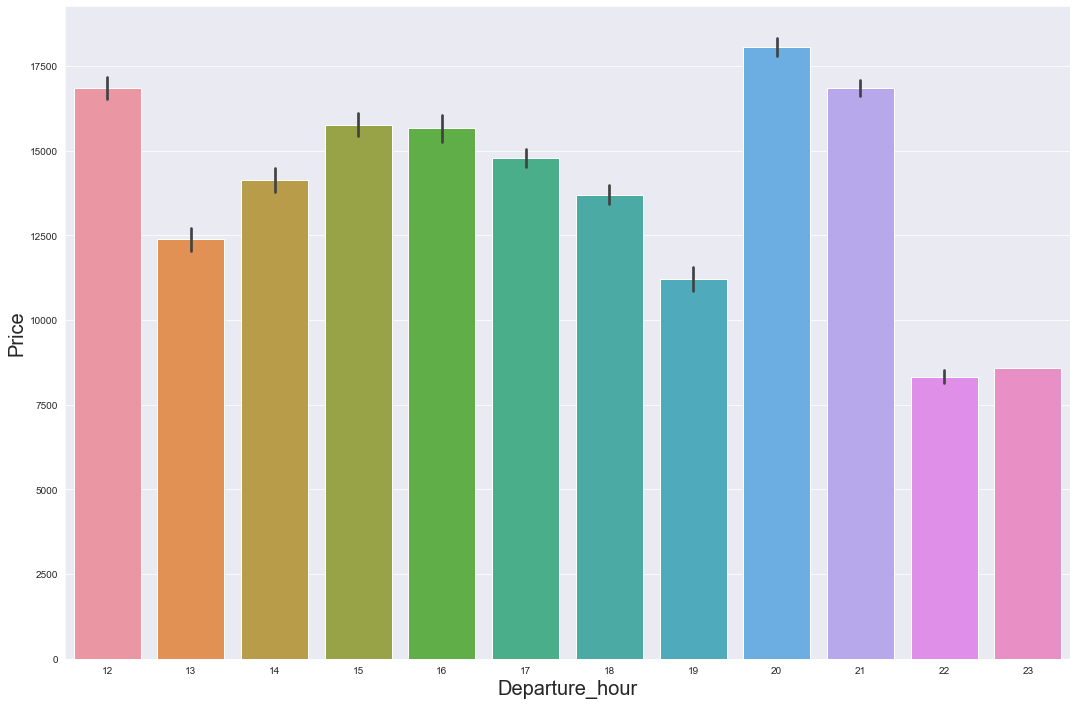

In [601]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Dep_hour',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Departure_hour',fontsize=20)
plt.show()

"Departure_Hour vs Price": From the bar plot and line plot we can see that there are some flights departing in the noon 12 AM having most expensive ticket prices compared to late evening flights. We can also observe the flight ticket prices are higher during evening (may fluctuate) and it decreases in the late night.

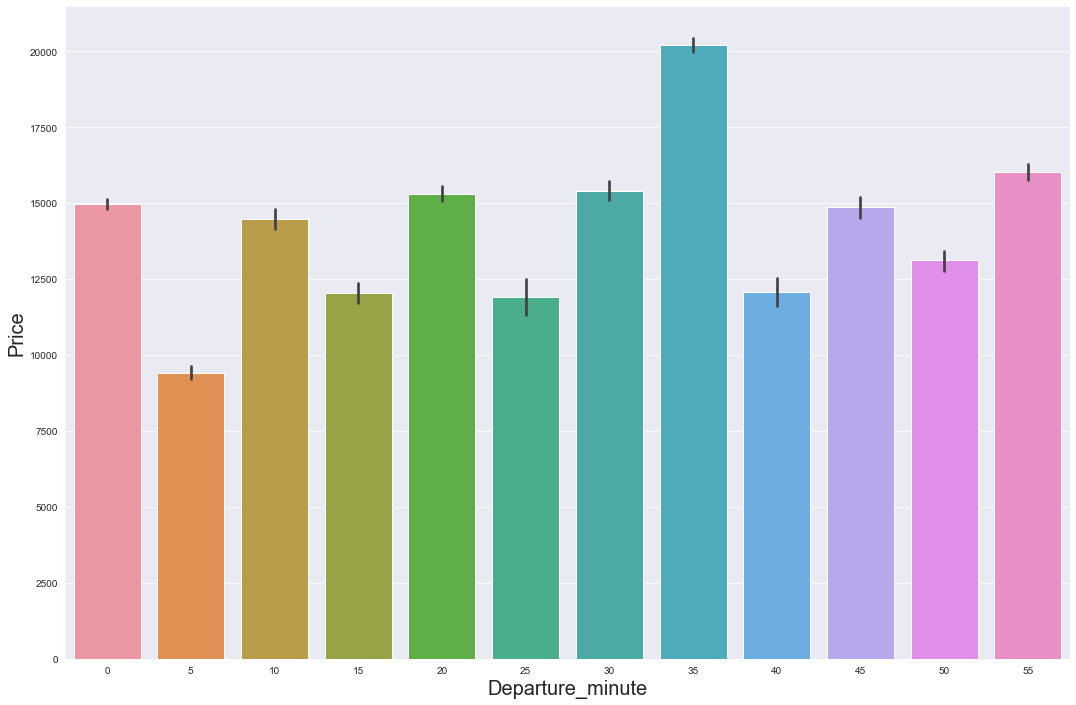

In [602]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Dep_min',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Departure_minute',fontsize=20)
plt.show()

## "Arrival_hour" vs "Price"

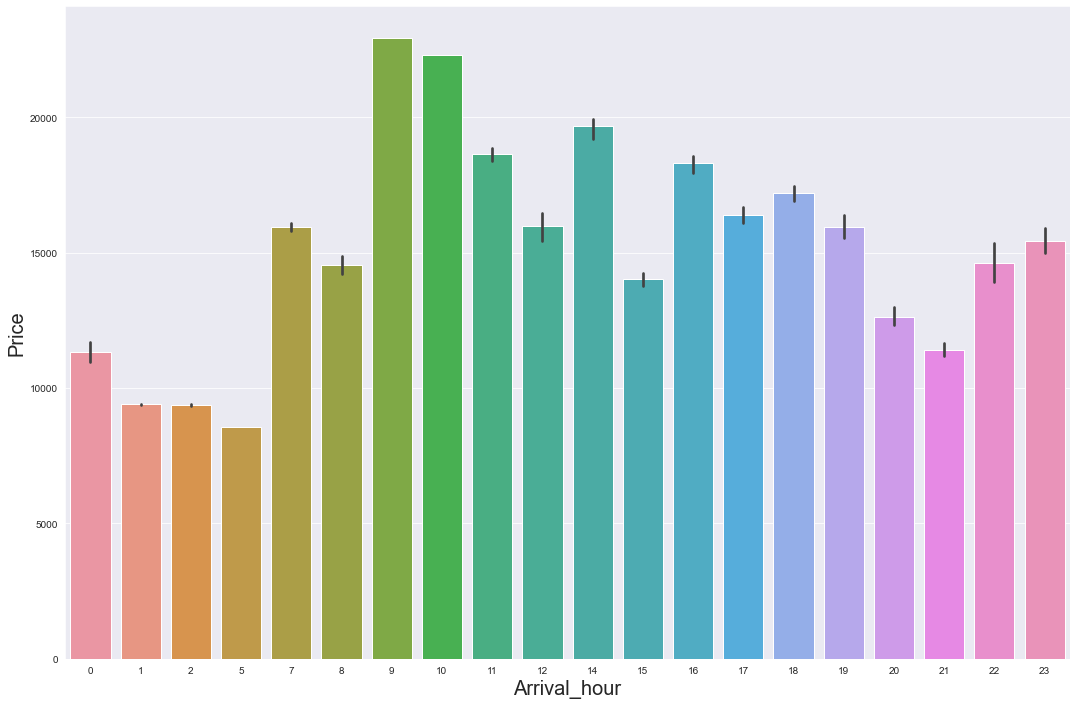

In [603]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Arrival_hour',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Arrival_hour',fontsize=20)
plt.show()

Ticket prices are very high during 9-10am where as early morning flights have low prices.

## "Duration_hour" vs "Price"

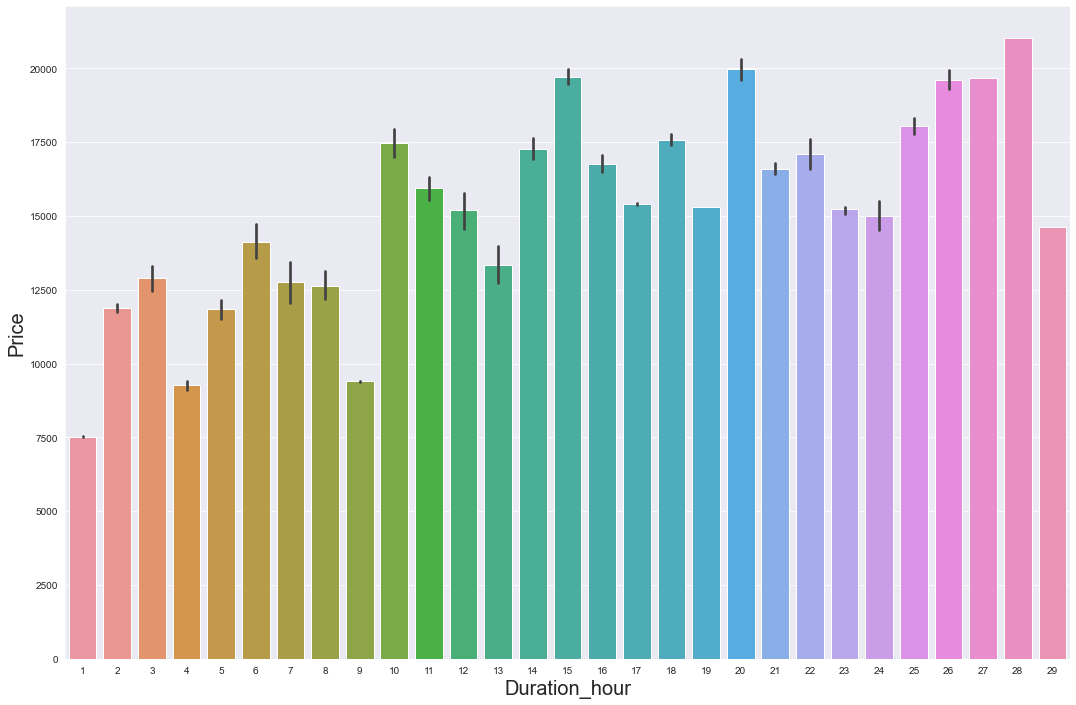

In [604]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Duration_hours',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration_hour',fontsize=20)
plt.show()

Long duration flights have higher ticket price and short duration flights have low ticket price

## "Duration_min" vs "Price"

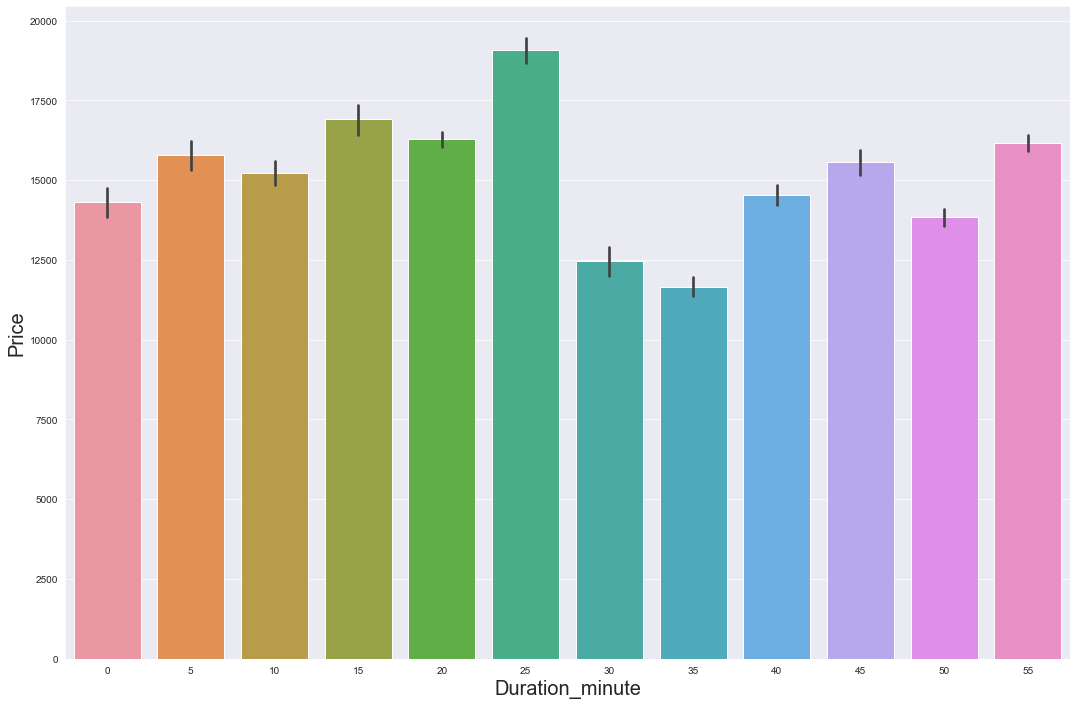

In [605]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Duration_min',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration_minute',fontsize=20)
plt.show()


In [606]:
df["Total_Stops"].value_counts()

1 Stop       4001
Non Stop     1057
2 Stop(s)     939
Name: Total_Stops, dtype: int64

### Assigning each value to Total_stops

In [607]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2}, inplace = True)

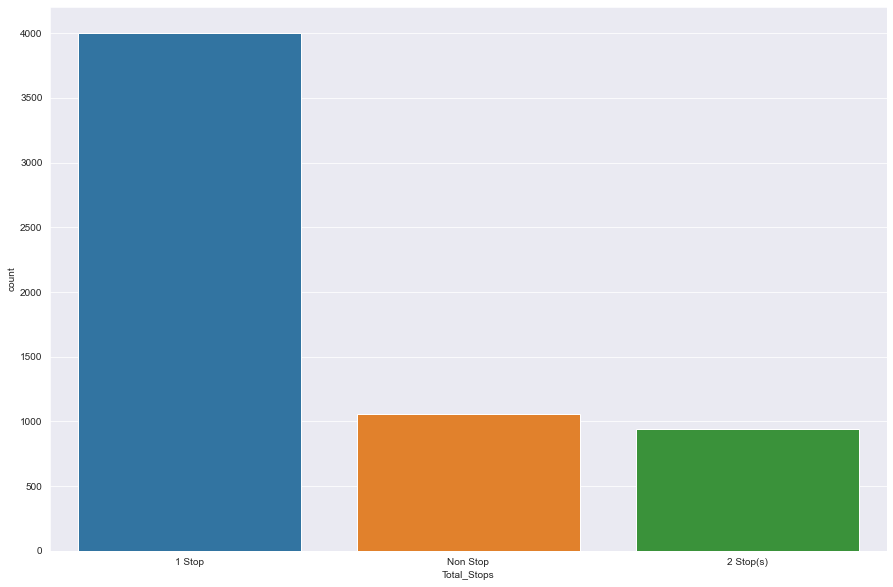

In [608]:
plt.figure(figsize=(15,10))
sns.countplot(df['Total_Stops'])
plt.show()

In [612]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,Air India,New Delhi,Mumbai,Free Meal,1 Stop,5955.0,17,55,22,10,4,15
1,Go First,New Delhi,Mumbai,None,1 Stop,7108.0,17,5,21,10,4,5
2,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,15,30,17,40,2,10
3,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,16,55,19,5,2,10
4,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,8578.0,12,45,15,0,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
5992,Vistara,Pune,Bangalore,Free Meal,1 Stop,22953.0,20,35,9,0,12,25
5993,Vistara,Pune,Bangalore,Free Meal,1 Stop,23688.0,20,35,22,40,26,5
5994,Air India,Pune,Bangalore,Free Meal,2 Stop(s),23793.0,21,55,18,20,20,25
5995,Air India,Pune,Bangalore,Free Meal,2 Stop(s),23793.0,21,55,18,20,20,25


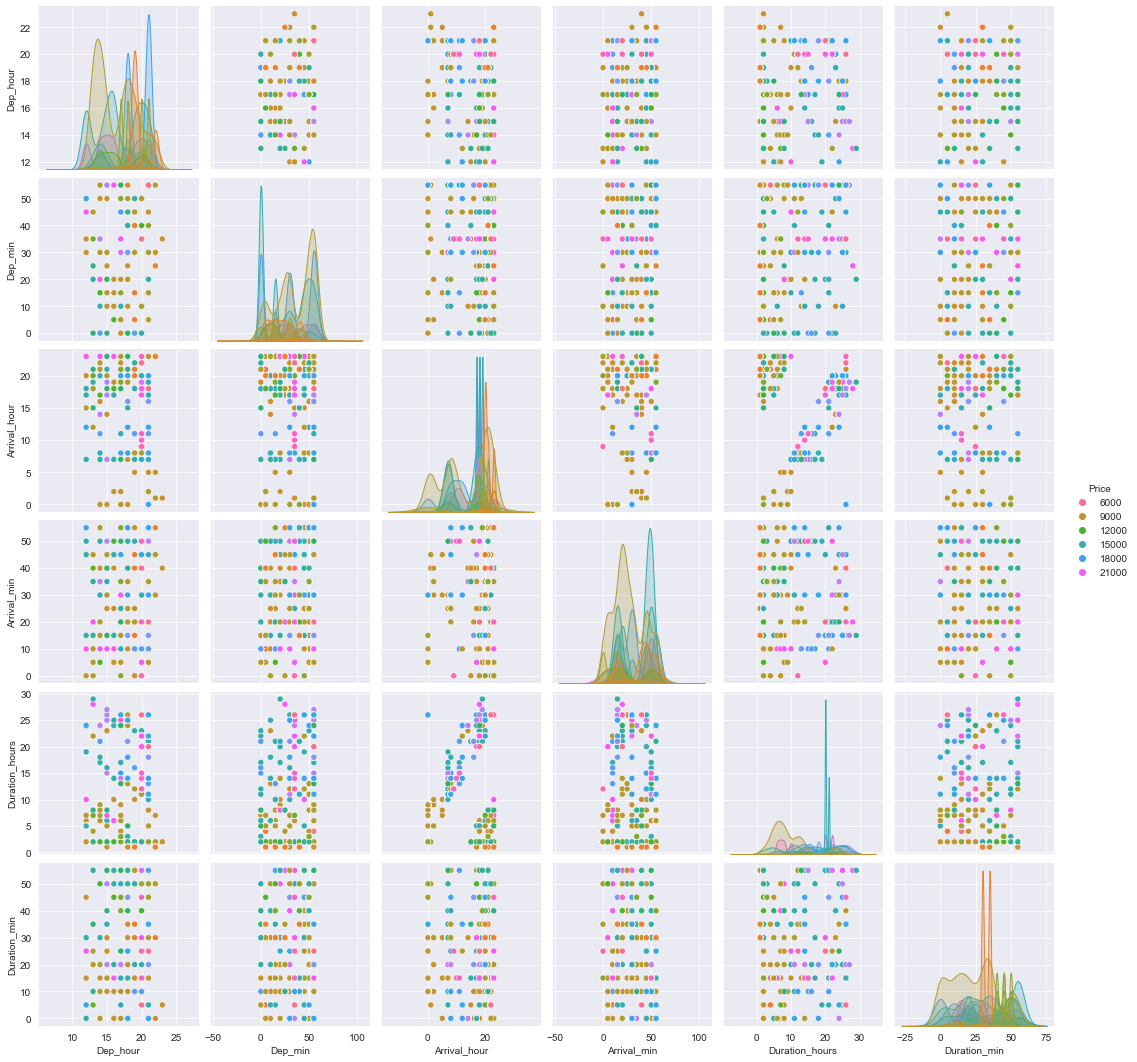

In [610]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

Flights with long duration and arriving in the evening have high ticket price.

There is no much linear relation between the attributes in the dataset.

## Label Encoding:

## Correlation:

In [613]:
df.corr()

,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
Price,1.000000,0.147562,0.161724,0.020325,-0.025428,0.590625,-0.083026
Dep_hour,0.147562,1.000000,0.029856,-0.192870,0.011476,0.048987,0.145756
Dep_min,0.161724,0.029856,1.000000,-0.033706,0.017678,0.211758,-0.084946
Arrival_hour,0.020325,-0.192870,-0.033706,1.000000,-0.159495,-0.033922,0.052013
Arrival_min,-0.025428,0.011476,0.017678,-0.159495,1.000000,-0.085485,-0.125994
Duration_hours,0.590625,0.048987,0.211758,-0.033922,-0.085485,1.000000,-0.119158
Duration_min,-0.083026,0.145756,-0.084946,0.052013,-0.125994,-0.119158,1.000000


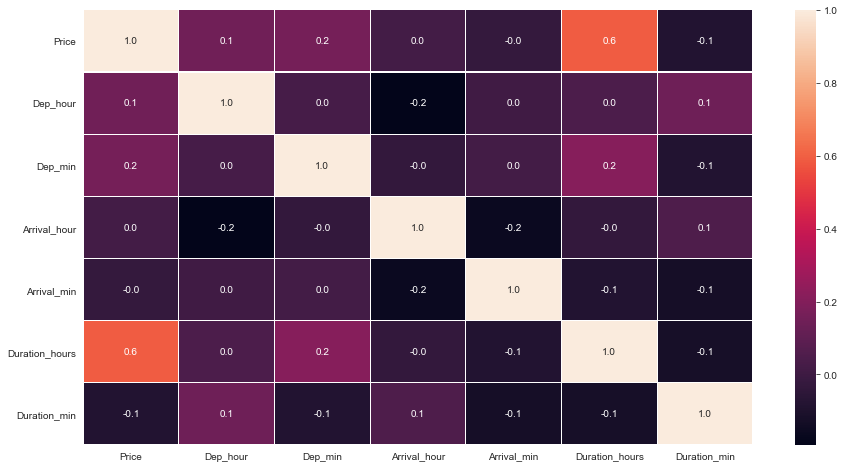

In [614]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

## Checking for Outliers:

Price                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Dep_hour          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Dep_min            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Arrival_hour      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Arrival_min       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Duration_hours       AxesSubplot(0.125,0.593621;0.133621x0.130172)
Duration_min      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

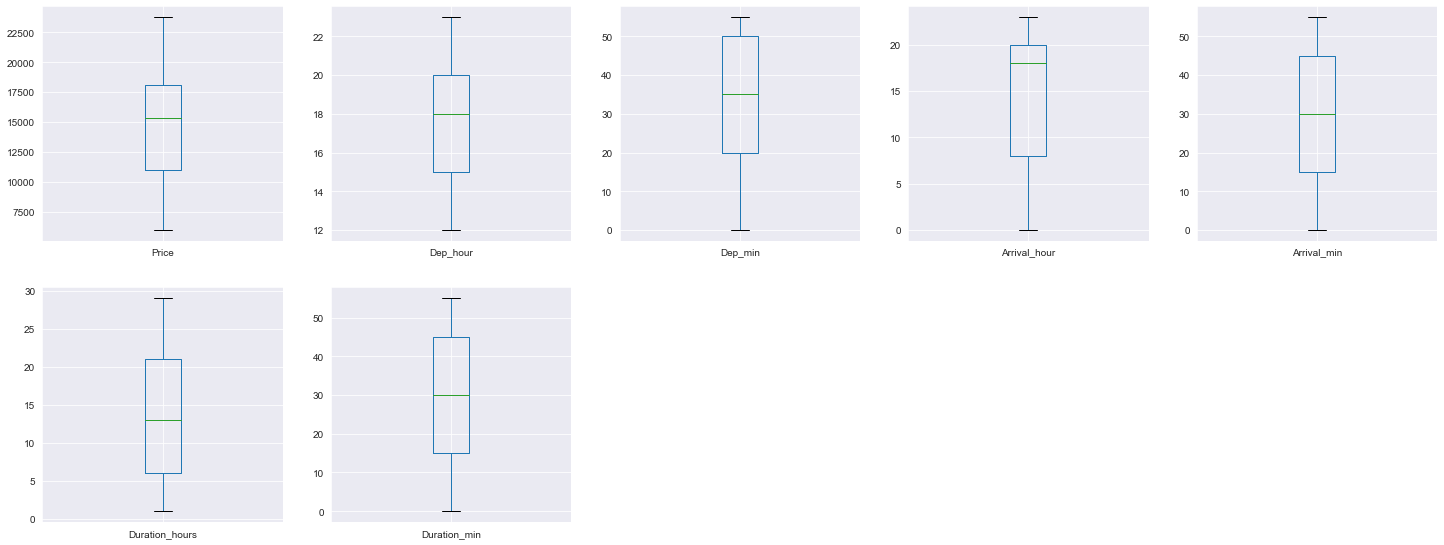

In [615]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

There are no outliers in the data

## Skewness:

In [616]:
#Checking for skewness
df.skew()

Price             0.020658
Dep_hour         -0.363591
Dep_min          -0.268292
Arrival_hour     -0.669623
Arrival_min       0.014998
Duration_hours    0.070907
Duration_min     -0.090288
dtype: float64

## Plotting Skewness:

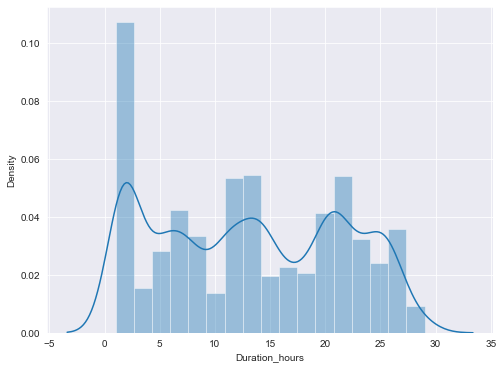

In [618]:
plt.figure(figsize=(8,6))
sns.distplot(df['Duration_hours'])
plt.show()

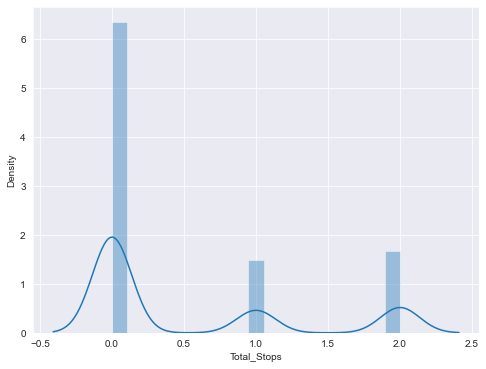

In [480]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total_Stops'])
plt.show()

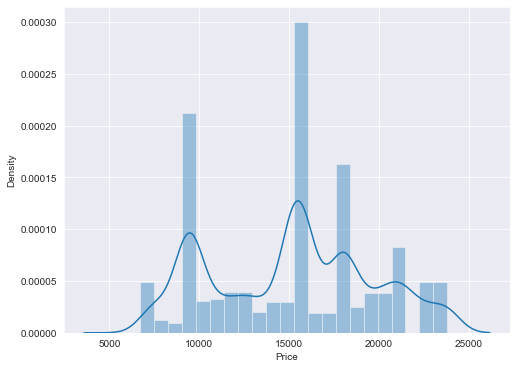

In [621]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'])
plt.show()

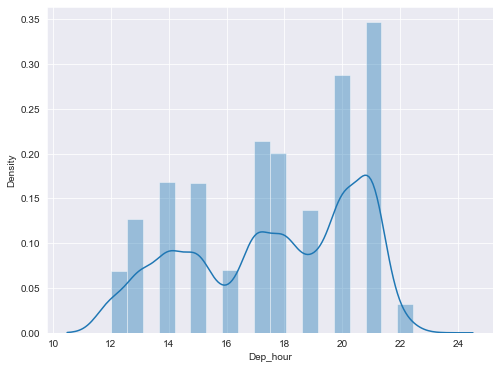

In [622]:
plt.figure(figsize=(8,6))
sns.distplot(df['Dep_hour'])
plt.show()

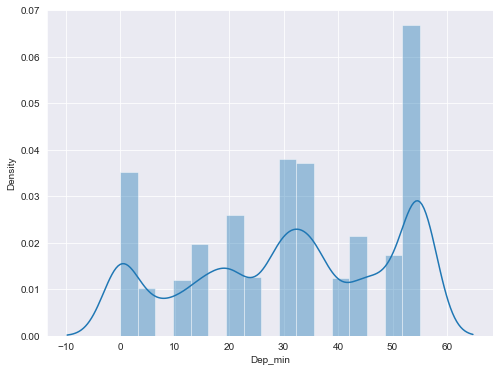

In [623]:
plt.figure(figsize=(8,6))
sns.distplot(df['Dep_min'])
plt.show()

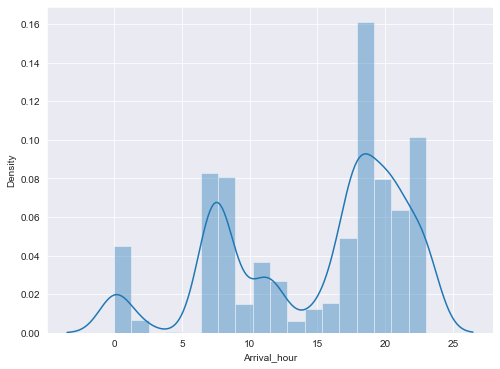

In [624]:
plt.figure(figsize=(8,6))
sns.distplot(df['Arrival_hour'])
plt.show()

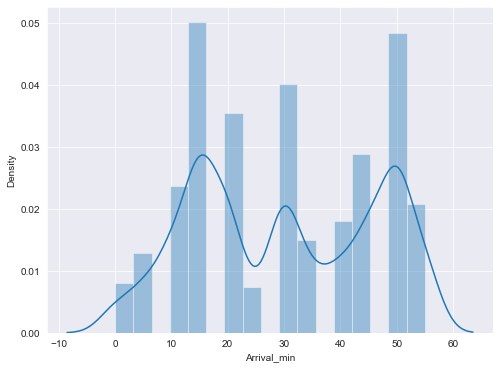

In [625]:
plt.figure(figsize=(8,6))
sns.distplot(df['Arrival_min'])
plt.show()

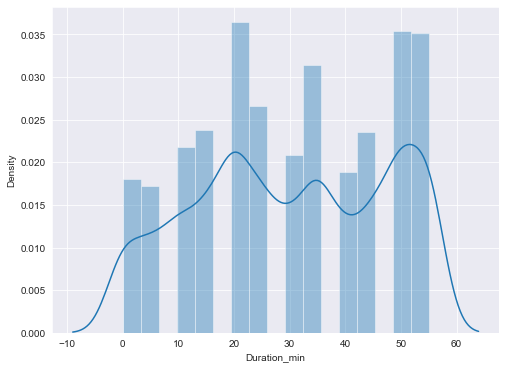

In [626]:
plt.figure(figsize=(8,6))
sns.distplot(df['Duration_min'])
plt.show()

 1.From the distribution plot we can observe that most of the columns are somewhat distributed normally as they have no proper bell shape curve.

 2. "Price" is widely distributed between the range of 5000 - 25000.we can observe that most number of tickets are priced at 15000 and 10000.

 3.The data in the column Arrival_Hour and Arrival_min skewed to left since the mean values is less than the median.

## Label Encoding:

In [627]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Meal_availability', 'Total_Stops']


In [628]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [629]:
df.head()

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,1,0,1,3,0,5955.0,17,55,22,10,4,15
1,2,0,1,4,0,7108.0,17,5,21,10,4,5
2,5,0,1,3,2,8578.0,15,30,17,40,2,10
3,5,0,1,3,2,8578.0,16,55,19,5,2,10
4,5,0,1,3,2,8578.0,12,45,15,0,2,15


In [630]:
df.corr()

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
Airline,1.000000,-0.226701,-0.013779,-0.027206,-0.028974,0.228200,-0.163452,0.051210,0.158742,0.123146,0.113435,0.086960
Source,-0.226701,1.000000,-0.048543,0.051330,0.007849,0.295355,0.416326,0.249520,0.097983,0.007218,0.113041,-0.120998
Destination,-0.013779,-0.048543,1.000000,0.061562,0.074413,-0.127018,-0.016266,-0.009499,-0.002187,-0.034346,-0.082706,-0.069621
Meal_availability,-0.027206,0.051330,0.061562,1.000000,0.120031,-0.182736,0.012654,-0.041828,0.060444,0.031815,-0.141928,0.035402
Total_Stops,-0.028974,0.007849,0.074413,0.120031,1.000000,-0.318787,0.180575,-0.055365,0.140259,-0.056263,-0.443594,0.395129
Price,0.228200,0.295355,-0.127018,-0.182736,-0.318787,1.000000,0.147562,0.161724,0.020325,-0.025428,0.590625,-0.083026
Dep_hour,-0.163452,0.416326,-0.016266,0.012654,0.180575,0.147562,1.000000,0.029856,-0.192870,0.011476,0.048987,0.145756
Dep_min,0.051210,0.249520,-0.009499,-0.041828,-0.055365,0.161724,0.029856,1.000000,-0.033706,0.017678,0.211758,-0.084946
Arrival_hour,0.158742,0.097983,-0.002187,0.060444,0.140259,0.020325,-0.192870,-0.033706,1.000000,-0.159495,-0.033922,0.052013
Arrival_min,0.123146,0.007218,-0.034346,0.031815,-0.056263,-0.025428,0.011476,0.017678,-0.159495,1.000000,-0.085485,-0.125994


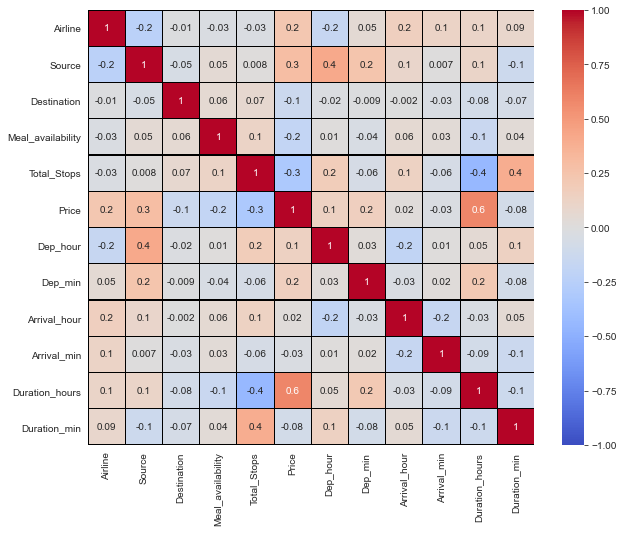

In [631]:
# Visualizing the correlation matrix by plotting heat map after label encoding
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

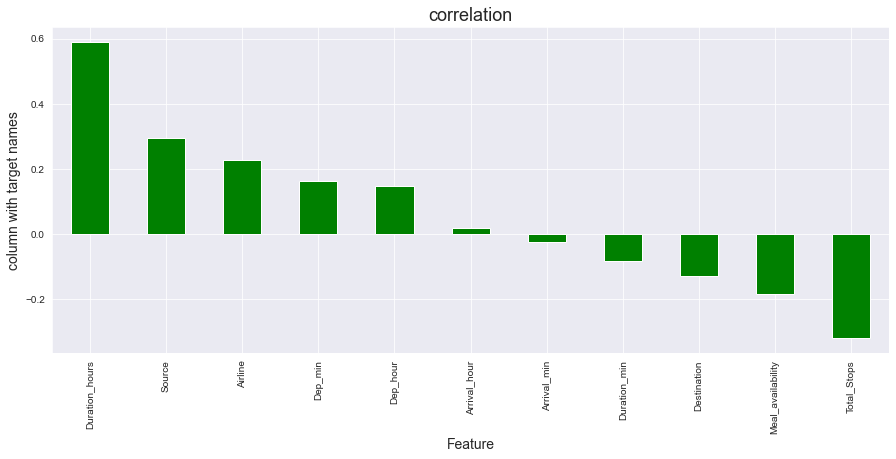

In [632]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Standard Scaler Method:

In [633]:
from sklearn.preprocessing import StandardScaler

In [634]:
X = df.drop(columns = ['Price'],axis=1)
y = df['Price']

In [635]:
X.shape, y.shape

((5997, 11), (5997,))

In [636]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

In [637]:
std_X

array([[-1.2613973 , -0.55828289,  6.86565435, ..., -1.23560367,
        -1.10319139, -0.88691077],
       [-0.69868067, -0.55828289,  6.86565435, ..., -1.23560367,
        -1.10319139, -1.4747863 ],
       [ 0.9894692 , -0.55828289,  6.86565435, ...,  0.61865213,
        -1.34320441, -1.18084853],
       ...,
       [-1.2613973 ,  1.79120659, -0.08695104, ..., -0.6175184 ,
         0.81691273, -0.29903524],
       [-1.2613973 ,  1.79120659, -0.08695104, ..., -0.6175184 ,
         0.81691273, -0.29903524],
       [-1.2613973 ,  1.79120659, -0.08695104, ..., -0.6175184 ,
         0.81691273, -0.29903524]])

## Checking for multicolinearity issue using VIF:

In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,5.073022,Airline
1,1.764743,Source
2,1.037057,Destination
3,25.947013,Meal_availability
4,2.235810,Total_Stops
5,29.192768,Dep_hour
6,4.262334,Dep_min
7,6.364729,Arrival_hour
8,4.679684,Arrival_min
9,4.848220,Duration_hours


Dep_hour has high multicolinearity,we can drop this column.

In [672]:
# Dropping Dep_hour column
X.drop("Dep_hour",axis=1,inplace=True)

In [673]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,5.067672,Airline
1,1.580157,Source
2,1.036565,Destination
3,14.751759,Meal_availability
4,2.178586,Total_Stops
5,4.246002,Dep_min
6,6.356960,Arrival_hour
7,4.456697,Arrival_min
8,4.428719,Duration_hours
9,4.926737,Duration_min


Even after removing multicolinearity, Meal_availability is having high VIF value so, we can drop this column. 

In [ ]:
# Dropping Dep_hour column
X.drop("Meal_availability",axis=1,inplace=True)

In [677]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,5.020299,Airline
1,1.575088,Source
2,1.023583,Destination
3,2.152513,Total_Stops
4,4.049235,Dep_min
5,5.154133,Arrival_hour
6,3.517043,Arrival_min
7,4.166403,Duration_hours
8,4.406736,Duration_min


## Model Building:

In [678]:
# import required libraries
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [679]:
#to find out best random state 
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9998625235774902  on Random_state  138


## Spliting Data

In [680]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.30, random_state=138)

## Ridge Regressor

In [681]:
R = Ridge()
R.fit(X_train,y_train)

Ridge()

In [682]:
R.score(X_train,y_train)

0.4685951990858602

In [683]:
pred_r = R.predict(X_test)

In [684]:
print('R2_SCORE:',r2_score(y_test,pred_r))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_r))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_r)))

R2_SCORE: 0.46097941551020305
Mean_Squared_Error: 11049540.310245022
Root Mean_Squared_Error: 3324.084883128742


## DecisionTreeRegressor

In [685]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [686]:
DTR.score(X_train,y_train)

1.0

In [687]:
pred_dtr = DTR.predict(X_test)

In [688]:
print('R2_SCORE:',r2_score(y_test,pred_dtr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_SCORE: 0.9995971922114072
Mean_Squared_Error: 8257.274444444445
Root Mean_Squared_Error: 90.86954629822053


## RandomForestRegressor

In [689]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [690]:
RFR.score(X_train,y_train)

0.9996439977513557

In [691]:
pred_rfr = RFR.predict(X_test)

In [692]:
print('R2_SCORE:',r2_score(y_test,pred_rfr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_SCORE: 0.9998614408424088
Mean_Squared_Error: 2840.3646191111116
Root Mean_Squared_Error: 53.29507124595211


## XGBRegressor

In [693]:
XGR = XGBRegressor()
XGR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [694]:
XGR.score(X_train,y_train)

0.9999999995351071

In [695]:
pred_xgr = XGR.predict(X_test)

In [696]:
print('R2_SCORE:',r2_score(y_test,pred_xgr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_xgr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_xgr)))

R2_SCORE: 0.999340998643385
Mean_Squared_Error: 13509.061182359723
Root Mean_Squared_Error: 116.2284869658025


In [697]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9997489902913556
mean_squared_error: 5145.521291277779
mean_absolute_error: 4.691927777777779
root_mean_squared_error: 71.73228904250706


From the above created models,we can conclude that "Random Tree Regressor" as the best fitting model.

## Hyper Parameter Tuning:

In [698]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [699]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [700]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [701]:
GCV.fit(X_train,y_train)

exception calling callback for <Future at 0x143c1057dc0 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\Users\

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

In [702]:
GCV.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20,
 'n_jobs': -2}

In [703]:
FlightPrice=ExtraTreesRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=20,n_jobs=-2)
FlightPrice.fit(X_train,y_train)
pred=FlightPrice.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 99.96076442994769
mean_squared_error: 8043.0140399691345
mean_absolute_error: 5.99649074074074
RMSE value: 89.68285254143701


## Saving the model

In [708]:
import joblib
joblib.dump(FlightPrice,"Prediction_of_FlightPrice.pkl")

['Prediction_of_FlightPrice.pkl']

### Predicting the saved model

In [705]:
# Loading the saved model
model=joblib.load("Prediction_of_FlightPrice.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([ 9419., 15615.,  9419., ..., 11940., 15571.,  7938.])

In [706]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,9419.0,23688.0
1,15615.0,16873.0
2,9419.0,17400.0
3,17913.0,12664.0
4,9997.0,17913.0
...,...,...
1795,18240.0,9419.0
1796,7413.0,9419.0
1797,11940.0,9419.0
1798,15571.0,20235.0
